# Proyecto ML. Show/ No Show

In [4]:
#Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and Describe the Dataset

In [5]:
citas = pd.read_csv('../data/show_no_show.csv')

In [6]:
#Look at the first five rows of all variables to evaluate the categorical variables as well
citas.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,None,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,None,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,None,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,None,0,0,No


In [7]:
#Look at the variables and their types
citas.dtypes

Unnamed: 0          int64
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism         object
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#Examine the descriptive statistics of the numeric variables
citas.describe()

,Unnamed: 0,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Handcap,SMS_received
count,110527.000000,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,1.474963e+14,5.675305e+06,37.049029,0.098266,0.197246,0.071865,0.022248,0.321026
std,31906.540939,2.560949e+14,7.129575e+04,23.524663,0.297675,0.397921,0.258265,0.161543,0.466873
min,0.000000,3.921784e+04,5.030230e+06,-232.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.500000,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55263.000000,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82894.500000,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,110526.000000,9.999816e+14,5.790484e+06,310.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Handle the Missing Data

In [9]:
citas.isnull().any(axis=1).sum()

345

In [10]:
missing_values = citas[citas.isnull().any(axis=1)]
missing_values

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
73,73,4.542132e+13,5552934,NaN,2016-04-06T18:12:38Z,2016-04-29T00:00:00Z,68,REPÚBLICA,0,1,1,None,0,1,No
416,416,3.987252e+14,5496971,NaN,2016-03-21T15:22:03Z,2016-04-29T00:00:00Z,32,ITARARÉ,0,0,0,None,0,1,No
603,603,7.351714e+14,5504986,NaN,2016-03-23T08:42:08Z,2016-04-29T00:00:00Z,58,ITARARÉ,0,0,0,None,0,1,No
725,725,3.498990e+11,5638769,NaN,2016-04-29T08:24:02Z,2016-04-29T00:00:00Z,68,CENTRO,0,1,0,None,0,0,No
738,738,2.385829e+12,5638933,NaN,2016-04-29T08:36:00Z,2016-04-29T00:00:00Z,3,JABOUR,0,0,0,None,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107917,107917,7.243677e+10,5621198,NaN,2016-04-26T09:58:28Z,2016-06-06T00:00:00Z,75,ILHA DE SANTA MARIA,0,0,0,None,0,1,No
109262,109262,2.455491e+14,5735166,NaN,2016-05-24T18:20:59Z,2016-06-03T00:00:00Z,19,SANTOS REIS,0,0,0,None,0,0,Yes
109406,109406,3.826224e+13,5748348,NaN,2016-05-30T19:48:14Z,2016-06-01T00:00:00Z,30,BARRO VERMELHO,0,0,0,None,0,0,No
109722,109722,5.887131e+12,5774018,NaN,2016-06-06T07:46:40Z,2016-06-06T00:00:00Z,8,RESISTÊNCIA,0,0,0,None,0,0,No


## Data cleaning

### Estrategia

In [11]:
def cat_column_analysis (df, col):
    
    """
    Dada un columna devuelve información relacionada con nulos y distribución.
    
    Inputs:
    df. datafrme
    col. nombre de la columna
    
    Output:
    -Valores nulos y su ratio si hay.
    -% de cada valor
    -bar plot
    
    """
    
    df_temp = pd.DataFrame(df[col])
    
    #Valores nulos
    if df[col].isnull().sum()>0:  
        print(f"Valores nulos: {df[col].isnull().sum()}. Un {round((df[col].isnull().sum()/len(df[col])*100),2)}%")
        df_temp[col] = df[col].fillna("NaN")
    else:
        print("No hay valores nulos.")
        
    # % según los valores únicos    
    print("Ratio de valores:")
    cd = pd.DataFrame(df_temp[col].value_counts())
    cd["%"] = [round((cd[col][value]/cd[col].sum()),4)*100 for value in cd.index]
    print(cd)
    
    #Visualización de la distribución
    print("Distribución:")
    display(df_temp[col].hist())

### Análisis

#### Gender

Valores nulos: 345. Un 0.31%
Ratio de valores:
     Gender      %
F     71607  64.79
M     38575  34.90
NaN     345   0.31
Distribución:


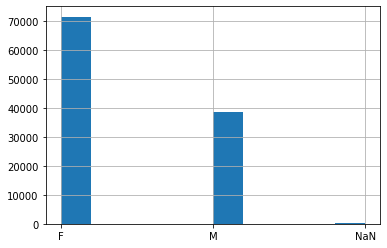

In [12]:
cat_column_analysis (citas, "Gender")

La proporción de valores nulos es pequeña. Al tratarse de una categoria binaria podríamos remplazarlos en proporción a los otros dos valores o crear una nueva categoría de NAs para ver si la gente que no facilita los datos también es la que acabar por no acudir a las citas.

#### Alcoholism

No hay valores nulos.
Ratio de valores:
          Alcoholism      %
None          107167  96.96
Low             1129   1.02
Moderate        1118   1.01
High            1113   1.01
Distribución:


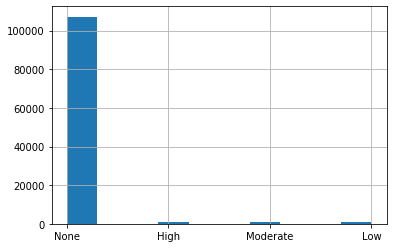

In [13]:
cat_column_analysis (citas, "Alcoholism")

A pesar de lo que en un principio pensamos que podría ser un atributo categórico binario, haciendo una exploración vemos que es categórico ordinal. Podríamos transformarla a numérico. Para ello crearemos una lista con los valores ordenados:
* 0 = None
* 1 = Low
* 2 = Moderate
* 3 = High

In [14]:
def cat_ord_to_num (df, col, lst):

    """
    Convierte una categórica ordinal en numérica manteniendo el orden.

    Input:
    * df : dataframe
    * col: columna a convertir
    * lst : lista ordenada de valores únicos de la columna a convertir

    Output:
    *new_col :lista con los valores convertidos

    """

    new_col = df[col].apply(lambda x: lst.index(x))

    return new_col

In [15]:
order = ["None", "Low", "Moderate", "High"]
citas['Alcoholism_num'] = cat_ord_to_num (citas, "Alcoholism", order)

#### No-show

No hay valores nulos.
Ratio de valores:
     No-show      %
No     88208  79.81
Yes    22319  20.19
Distribución:


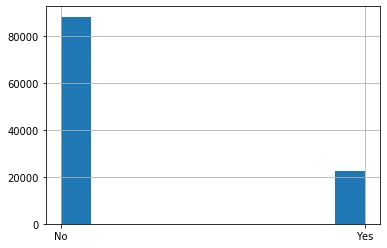

In [240]:
cat_column_analysis (citas, "No-show")

Se me hace un poco raro que el "Sí" sean los que no vienen...